<a href="https://colab.research.google.com/github/evcaburnay/EE-298-Project/blob/main/ResNet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
!pip install timm
import timm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable

     |████████████████████████████████| 296kB 9.0MB/s 


In [2]:
trainset = datasets.SVHN(root='data/', split='train',download=True,
                        transform = transforms.ToTensor())

testset = datasets.SVHN(root='data/', split='test', download=True,
                       transform = transforms.ToTensor())

In [3]:
batch_size = 64
num_labels = 10
epochs = 10

In [4]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size = batch_size, shuffle=True)

In [5]:
model = timm.create_model('resnet34')
model.fc = nn.Sequential(
    nn.Linear(in_features = 512, out_features = 128, bias=True),
    nn.Linear(in_features = 128, out_features = 32, bias=True),
    nn.Linear(in_features = 32, out_features = num_labels, bias=True),
    nn.LogSoftmax(dim=1))

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

indices = []
loss_list = []
train_correct = 0
model.train()
for epoch in range(epochs):
    for data, target in trainloader:
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        pred = output.data.max(1, keepdim=True)[1]
        train_correct += pred.eq(target.data.view_as(pred)).cpu().sum()
        loss.backward()
        optimizer.step()

    print("Epoch: {:.0f}\tLoss: {:.6f}".format(epoch, loss.item()))
    loss_list.append(loss.item())
    indices.append(epoch)

print("\nTraining accuracy: {}/{} ({:.2f}%)\n".format(
      train_correct, len(trainloader.dataset)*epochs,
      100. * train_correct / (len(trainloader.dataset)*epochs)))


Epoch: 0	Loss: 0.329455
Epoch: 1	Loss: 0.429829
Epoch: 2	Loss: 0.471750
Epoch: 3	Loss: 0.289910
Epoch: 4	Loss: 0.297317
Epoch: 5	Loss: 0.141761
Epoch: 6	Loss: 0.077861
Epoch: 7	Loss: 0.237637
Epoch: 8	Loss: 4.822365
Epoch: 9	Loss: 0.198625

Training accuracy: 646153/732570 (88.20%)



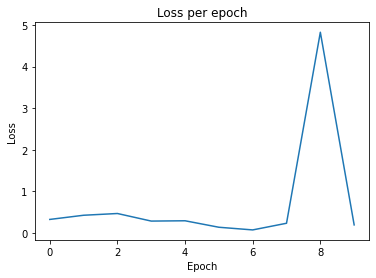

In [7]:
plt.plot(indices, loss_list)
plt.title('Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [9]:
with torch.no_grad():            
  model.eval()
  test_loss = 0
  test_correct = 0
  for data, target in testloader:
      data, target = Variable(data), Variable(target)
      output = model(data)
      test_loss += F.nll_loss(output, target, reduction='sum').data
      pred = output.data.max(1, keepdim=True)[1]
      test_correct += pred.eq(target.data.view_as(pred)).cpu().sum()

test_loss /= len(testloader.dataset)
print("Test set: Average loss: {:.4f}, Test Accuracy: {}/{} ({:.2f}%)".format(
      test_loss, test_correct, len(testloader.dataset),
      100. * test_correct / len(testloader.dataset)))

Test set: Average loss: 0.3173, Test Accuracy: 23631/26032 (90.78%)
